In [ ]:
#getting data up to the google bucket from prem in the command line:
#note that this in all in the unix command line environment
###########################################################
#use .google-cloud-sdk
#cd /medpop/afib/ahall/ChIP-seq/2019_07_analysis/LA_LV_enhancer_roadmap/
#gsutil cp 2020_04_10_LA_specific_vs_all_enhancer.txt gs://fc-991b1ab1-8200-49a9-8bde-e91a107816ff/data/

#cd /medpop/afib/ahall/atrial_dx_cardiomyocytes/hESC_atrial_cardiomyocyte/quant_tximport/DAVID/
#gsutil cp heart_vs_CM_upregulated.txt gs://fc-991b1ab1-8200-49a9-8bde-e91a107816ff/data/
#gsutil cp heart_vs_CM_downregulated.txt gs://fc-991b1ab1-8200-49a9-8bde-e91a107816ff/data/

#cd /medpop/afib/ahall/ChIP-seq/2019_05_analysis/rnaseq_intersect/
#gsutil cp gencode.v29.proteinCoding.names gs://fc-991b1ab1-8200-49a9-8bde-e91a107816ff/data/
#gsutil cp LA1202_21statemodel_RNAseq.intersect gs://fc-991b1ab1-8200-49a9-8bde-e91a107816ff/data/

#cd /medpop/afib/ahall/ChIP-seq/2019_07_analysis/enhancer_scores/all_scores/
#gsutil cp allSamples.allEnh.targetPeak.score.sort.merged.width.sort.bed gs://fc-991b1ab1-8200-49a9-8bde-e91a107816ff/data/

#cd /medpop/afib/ahall/ChIP-seq/2019_07_analysis/enhancer_scores
#gsutil cp 2019_08_13_LA_LV_normalized_RNA_seq_data_ensembl_coords.chr.avg.sort.bed gs://fc-991b1ab1-8200-49a9-8bde-e91a107816ff/data/
#cd /medpop/afib/ahall/ChIP-seq/2019_07_analysis/enhancer_scores/intersections
#gsutil cp allSamples.allEnh.targetPeak.score.sort.merged.width.avgLAexpression.intersect gs://fc-991b1ab1-8200-49a9-8bde-e91a107816ff/data/
#gsutil cp allSamples.allEnh.targetPeak.score.sort.merged.width.heartAnyLoop.intersect gs://fc-991b1ab1-8200-49a9-8bde-e91a107816ff/data/


# Environmental setup

In [1]:
#define a time saving function for package installation, via:
#https://app.terra.bio/#workspaces/fc-product-demo/Terra-Notebooks-Quickstart/notebooks/launch/1_R_environment_setup.ipynb
install_if_missing <- function(packages) {
    if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
        install.packages(setdiff(packages, rownames(installed.packages())))
    }
}

In [2]:
install_if_missing(c('ggplot2','tidyr', 'plyr', 'dplyr', 'reshape2', 'Cairo','grid','scales','RColorBrewer'))

In [3]:
#bring in libraries for plotting/data handling 
library(ggplot2)
library(tidyr)
library(plyr)
library(dplyr)
library(reshape2)
library(RColorBrewer) 
library(grid)
library(scales)  
theme_set(theme_bw()) ## to set all plots in session to black/white


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [4]:
#make a directory to store our data and plot output - only do this once!
dir.create("plots")
dir.create("data")

Warning message in dir.create("plots"):
“'plots' already exists”
Warning message in dir.create("data"):
“'data' already exists”


# Download data using gsutil and check directory structure

In [5]:
#go get our data files
system("gsutil cp -r gs://fc-991b1ab1-8200-49a9-8bde-e91a107816ff/data/* data/")

In [6]:
#check the directory structure:
dir()


[1] "2019_ggplot2_tidyverse_plotting_examples.ipynb"      
[2] "2020_10_08_bulk_RNAseq_pathwayAnalysis.ipynb"        
[3] "2021_09_human_aorta_single_cell_cumulus_scanpy.ipynb"
[4] "data"                                                
[5] "plots"

In [7]:
dir("data") #these are all the files just downloaded using gsutil!

[1] "2019_08_13_LA_LV_normalized_RNA_seq_data_ensembl_coords.chr.avg.sort.bed"      
 [2] "2020_04_10_LA_specific_vs_all_enhancer.txt"                                    
 [3] "allSamples.allEnh.targetPeak.score.sort.merged.width.avgLAexpression.intersect"
 [4] "allSamples.allEnh.targetPeak.score.sort.merged.width.heartAnyLoop.intersect"   
 [5] "allSamples.allEnh.targetPeak.score.sort.merged.width.sort.bed"                 
 [6] "data"                                                                          
 [7] "gencode.v29.proteinCoding.names"                                               
 [8] "heart_vs_CM_downregulated.txt"                                                 
 [9] "heart_vs_CM_upregulated.txt"                                                   
[10] "LA1202_21statemodel_RNAseq.intersect"                                          
[11] "plots"

In [8]:
getwd()

[1] "/home/jupyter/notebooks/useful notebooks for teaching/edit"

In [9]:
setwd("data")

In [10]:
dir() #check out the structure of the directory you're in

[1] "2019_08_13_LA_LV_normalized_RNA_seq_data_ensembl_coords.chr.avg.sort.bed"      
 [2] "2020_04_10_LA_specific_vs_all_enhancer.txt"                                    
 [3] "allSamples.allEnh.targetPeak.score.sort.merged.width.avgLAexpression.intersect"
 [4] "allSamples.allEnh.targetPeak.score.sort.merged.width.heartAnyLoop.intersect"   
 [5] "allSamples.allEnh.targetPeak.score.sort.merged.width.sort.bed"                 
 [6] "data"                                                                          
 [7] "gencode.v29.proteinCoding.names"                                               
 [8] "heart_vs_CM_downregulated.txt"                                                 
 [9] "heart_vs_CM_upregulated.txt"                                                   
[10] "LA1202_21statemodel_RNAseq.intersect"                                          
[11] "plots"

In [11]:
getwd()#make sure the wd is what we expect (what we set above)

[1] "/home/jupyter/notebooks/useful notebooks for teaching/edit/data"

# Barplots (percentage)

In [12]:
#2020_04_10_CVD_SNPs_by_LA_enhancer.R
#read in the data - these are enhancers in the LA epigenomic dataset overlapping with several cardiovascular traits
all_traits_all_states <- read.table('2020_04_10_LA_specific_vs_all_enhancer.txt', sep="\t", header=TRUE, stringsAsFactors = FALSE)
#make a percentage column
all_traits_all_states$pct <- all_traits_all_states$percentage * 100
#establish levels for the $data varialbe
all_traits_all_states$data <- factor(all_traits_all_states$data, levels=c("none","LA_unique","LA_all"))
#establish levels for the $trait variable
all_traits_all_states$trait <- factor(all_traits_all_states$trait, levels=c("QT","PR","CAD","BP","AF"))


In [13]:
head(all_traits_all_states)

trait data      count percentage pct     
1 AF    LA_all    27    0.2872340  28.72340
2 AF    LA_unique 12    0.1276596  12.76596
3 AF    none      55    0.5851064  58.51064
4 BP    LA_all    21    0.2058824  20.58824
5 BP    LA_unique 11    0.1078431  10.78431
6 BP    none      70    0.6862745  68.62745

In [14]:
dim(all_traits_all_states)

[1] 15  5

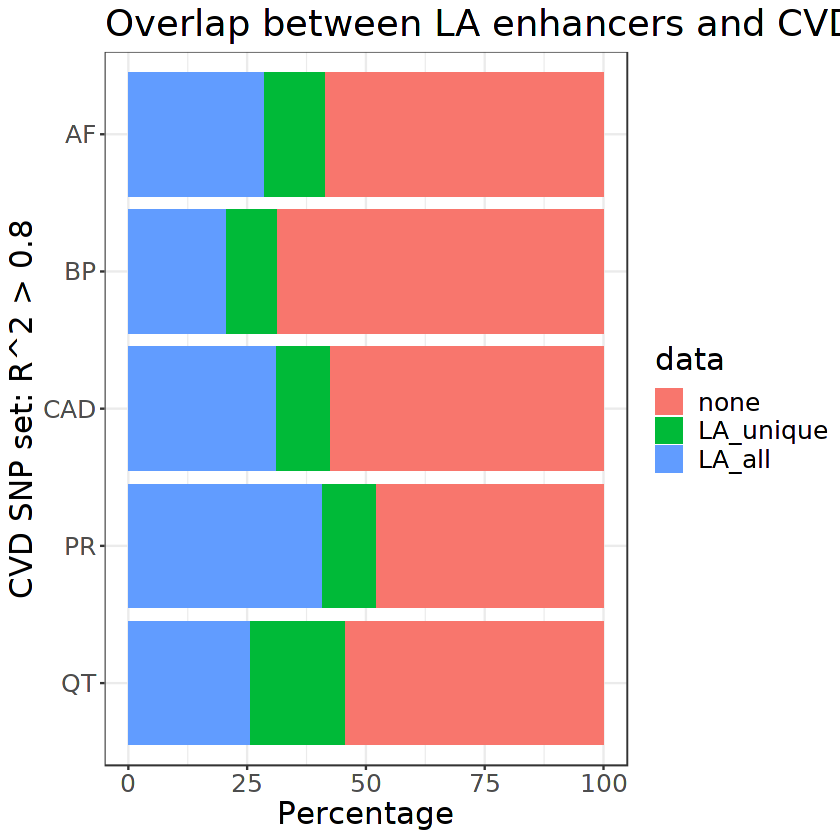

In [15]:
#let's plot this! 
#https://ggplot2.tidyverse.org/reference/geom_bar.html
p <- all_traits_all_states %>% #we store this in a variable "p"
  ggplot(aes(x = trait, y = pct)) +  #plot traits on the X axis, and percentage across the Y axis
  geom_col(aes(fill = data)) + #use the "$data" variable to fill the columns (geom_col means this is a column or barplot)
  coord_flip() #and finally flip it so we view the bar as horizontal and not vertical

#actually handling the previous "p" variable and adding labels
p + theme(text = element_text(size=18), axis.text.x = element_text(angle = 0, hjust = 0.5)) + labs(title = "Overlap between LA enhancers and CVD SNP loci") + labs(y="Percentage") + labs(x="CVD SNP set: R^2 > 0.8")


# Barplots (GO-term enrichment)

In [16]:
#2018_12_18_DAVID_bar_plots_hESC.R
#heart vs CM
heartCM_upregulated <- read.table('heart_vs_CM_upregulated.txt', sep="\t", stringsAsFactors = FALSE, header=TRUE)
heartCM_downregulated <- read.table('heart_vs_CM_downregulated.txt', sep="\t", stringsAsFactors = FALSE, header=TRUE)

######################################
##### factor and order handling ######
######################################
heartCM_upregulated$P.value <- as.factor(heartCM_upregulated$P.value)
heartCM_upregulated$P.value <- factor(heartCM_upregulated$P.value, levels=rev(levels(heartCM_upregulated$P.value)))
heartCM_upregulated$GO_BP_term <- factor(heartCM_upregulated$GO_BP_term, levels = heartCM_upregulated$GO_BP_term[order(heartCM_upregulated$P.value)])

heartCM_downregulated$P.value <- as.factor(heartCM_downregulated$P.value)
heartCM_downregulated$P.value <- factor(heartCM_downregulated$P.value, levels=rev(levels(heartCM_downregulated$P.value)))
heartCM_downregulated$GO_BP_term <- factor(heartCM_downregulated$GO_BP_term, levels = heartCM_downregulated$GO_BP_term[order(heartCM_downregulated$P.value)])



In [17]:
head(heartCM_upregulated)

GO_BP_term                       GO_identifier Homo.sapiens...REFLIST..21042.
1 Toll-like receptor binding       GO:0035325     12                           
2 IgG binding                      GO:0019864     11                           
3 immunoglobulin binding           GO:0019865     23                           
4 immunoglobulin receptor binding  GO:0034987     99                           
5 antigen binding                  GO:0003823    227                           
6 chemokine activity               GO:0008009     49                           
  num_uploaded expected fold_Enrichment P.value 
1  8            0.57    14.10           0.00363 
2  7            0.52    13.46           0.0214  
3 10            1.09     9.19           0.00336 
4 30            4.68     6.41           2.19e-10
5 62           10.73     5.78           1.03e-21
6 13            2.32     5.61           0.00885

Warning message:
“Use of `heartCM_upregulated$P.value` is discouraged. Use `P.value` instead.”
Warning message:
“Use of `heartCM_downregulated$P.value` is discouraged. Use `P.value` instead.”


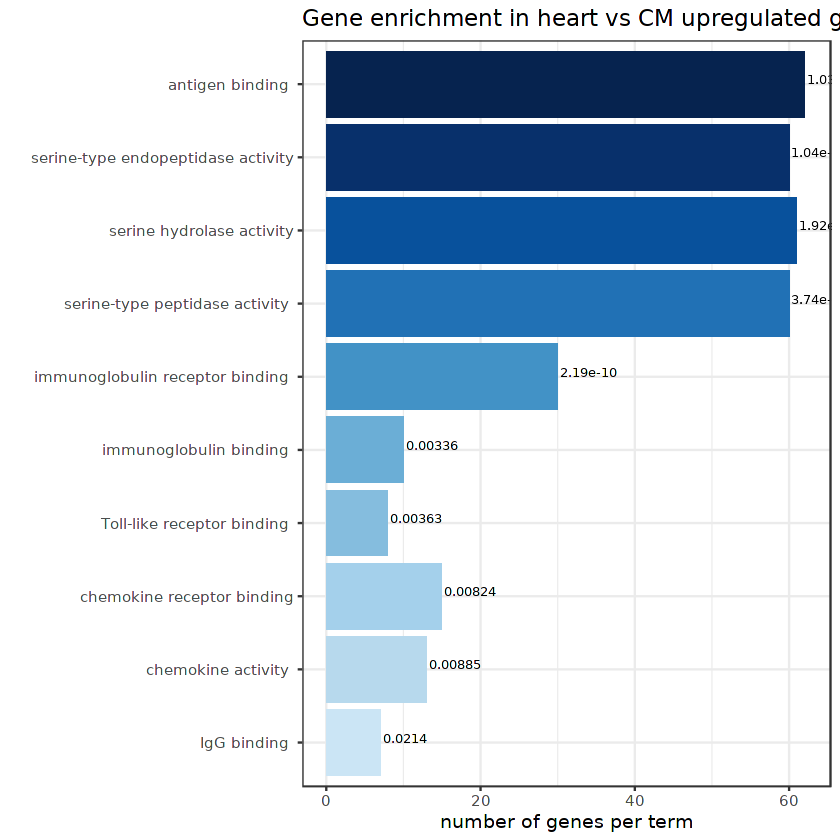

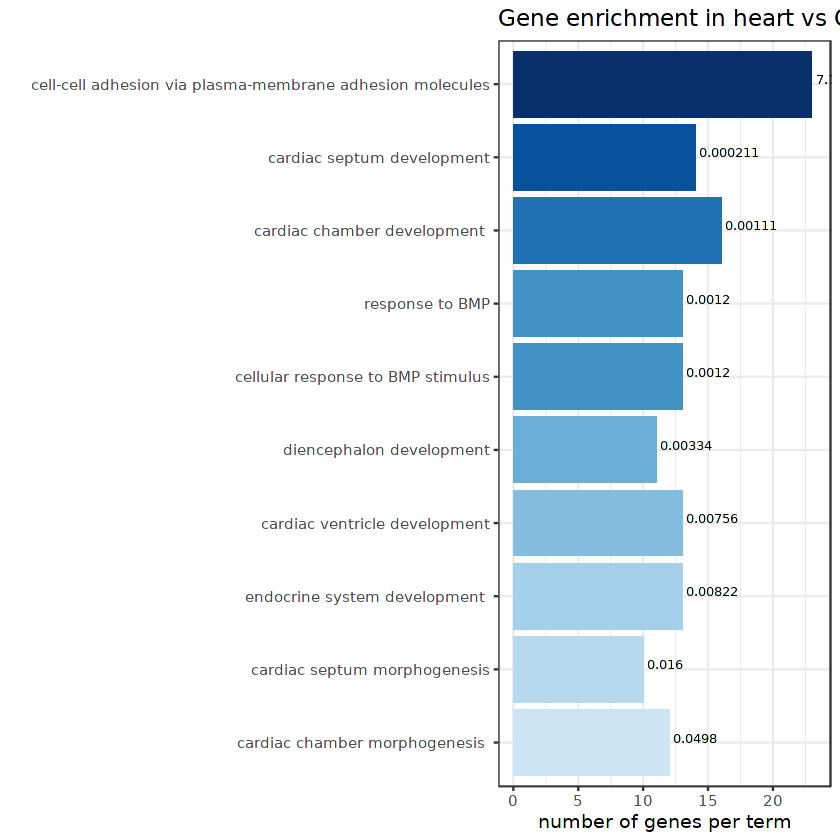

In [18]:
###################################
##### plotting using ggplot2 ######
###################################

#custom palette
blues_pval <- c("#06234F","#08306B","#08519C","#2171B5","#4292C6","#6BAED6","#85BDDE","#A4D0EB","#B7D9ED","#BFD2DE")
rev_blues <-c("#CBE5F5","#B7D9ED","#A4D0EB","#85BDDE","#6BAED6","#4292C6","#2171B5","#08519C","#08306B","#06234F")

#heartCM_upregulated
p <- heartCM_upregulated %>%
  ggplot(aes(x = GO_BP_term, y = num_uploaded, fill=P.value)) +
  geom_bar(stat="identity", position = "identity") + 
  scale_fill_manual(values = setNames(rev_blues, levels(heartCM_upregulated$P.value))) +
  labs(x="", y="number of genes per term", title="Gene enrichment in heart vs CM upregulated genes") +
  geom_text(aes(x=GO_BP_term, y=num_uploaded + 0.3 * sign(num_uploaded),
                label=format(heartCM_upregulated$P.value, digits=2)),
            hjust=0, vjust=0, size=2.7,
            color=rgb(0,0,0, maxColorValue=255)) +
  coord_flip()
p + theme(legend.position = "none", axis.text.x = element_text(angle = 0, hjust = 0.5, vjust=1))


#heartCM_downregulated
p <- heartCM_downregulated %>%
  ggplot(aes(x = GO_BP_term, y = num_uploaded, fill=P.value)) +
  geom_bar(stat="identity", position = "identity") + 
  scale_fill_manual(values = setNames(rev_blues, levels(heartCM_downregulated$P.value))) +
  labs(x="", y="number of genes per term", title="Gene enrichment in heart vs CM downregulated genes") +
  geom_text(aes(x=GO_BP_term, y=num_uploaded + 0.3 * sign(num_uploaded),
                label=format(heartCM_downregulated$P.value, digits=2)),
            hjust=0, vjust=0, size=2.7,
            color=rgb(0,0,0, maxColorValue=255)) +
  coord_flip()
p + theme(legend.position = "none", axis.text.x = element_text(angle = 0, hjust = 0.5, vjust=1))

# Boxplots (gene expression analysis by chromatin state)

In [19]:
getPalette = colorRampPalette(brewer.pal(9, "Set1"))
rhg_cols <- getPalette(20)

In [20]:
processSampData <- function(sdxx_exp_data, sampID){
  
  gencode_v29_protCoding <- read.table('gencode.v29.proteinCoding.names', header=FALSE)
  sdxx_exp_protCode <- sdxx_exp_data[which(sdxx_exp_data$V8 %in% gencode_v29_protCoding$V1),]
  
  #need to ensure a unique combination of state and chrom (plus name)
  sdxx_exp_protCode$id <- paste(sdxx_exp_protCode$V4, sdxx_exp_protCode$V5, sdxx_exp_protCode$V6, sdxx_exp_protCode$V7, sdxx_exp_protCode$V8, sep="_")
  sdxx_exp_protCodeUq <- sdxx_exp_protCode[!duplicated(sdxx_exp_protCode[, c("id")]), ]
  
  #make V4 named "state"; #make V9 named "expression"
  colnames(sdxx_exp_protCodeUq)[4] <- "state"
  colnames(sdxx_exp_protCodeUq)[9] <- "expression"
  
  #getting the factors into the correct order
  sdxx_exp_protCodeUq$state <- as.factor(sdxx_exp_protCodeUq$state)
  sdxx_exp_protCodeUq$state <- factor(sdxx_exp_protCodeUq$state, levels=c("E21","E20","E18","E17","E16", "E15", "E14", "E13", "E12", "E11", "E10", "E9", "E8", "E7", "E6","E5","E4","E3","E2","E1"))
  
  #add a sample column
  sdxx_exp_protCodeUq <- sdxx_exp_protCodeUq %>% mutate(samp = sampID)
  return(sdxx_exp_protCodeUq) 
}

makeExpPlotSingle <- function(sdxx_exp_protCodeUq,lim){
  rhg_cols <- getPalette(20)
  
  p <- sdxx_exp_protCodeUq %>%
    ggplot(aes(x = state, y = expression, colour = state)) +
    scale_color_manual(values = setNames(rhg_cols, levels(sdxx_exp_protCodeUq$state))) +
    geom_boxplot(outlier.shape = NA, notch=TRUE, lwd=1) + #lwd = 2 so it shows better when exported in 1000 x 800
    scale_y_continuous(limits=c(-0.5,lim))
  
  p + theme(legend.position = "none") #makes a plot
  
}


Warning message:
“Removed 46 rows containing non-finite values (stat_boxplot).”
notch went outside hinges. Try setting notch=FALSE.

notch went outside hinges. Try setting notch=FALSE.



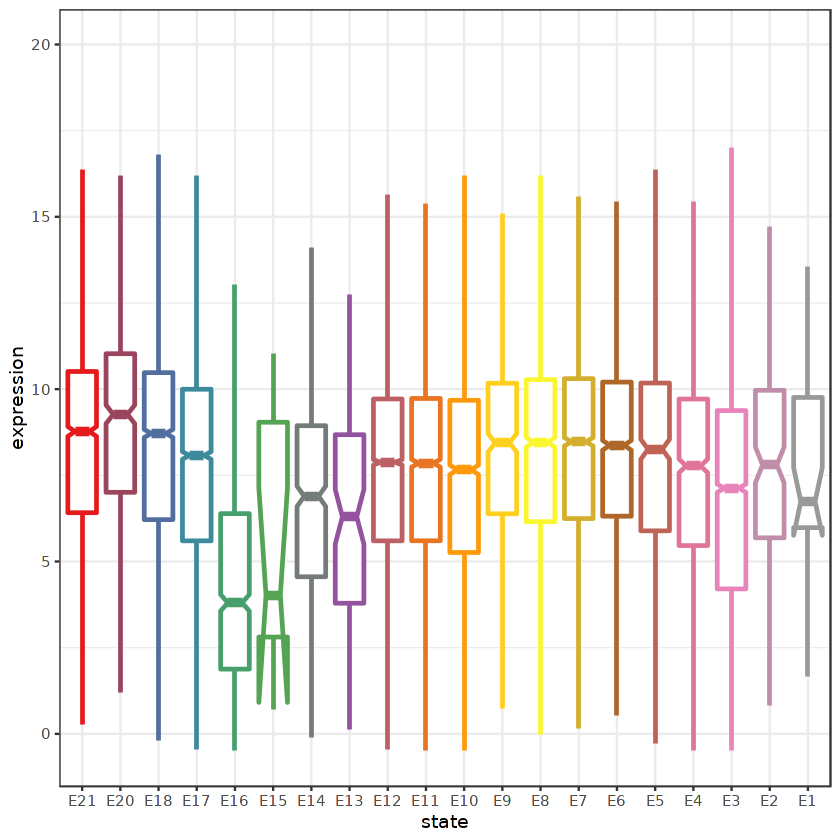

In [21]:
LA1202 <- read.table('LA1202_21statemodel_RNAseq.intersect', sep="\t", stringsAsFactors = FALSE, header=FALSE)
LA1202_exp_df <- processSampData(LA1202, "LA1202")
makeExpPlotSingle(LA1202_exp_df,20)

In [22]:
LA1202_exp_df_E1 <- subset(LA1202_exp_df, LA1202_exp_df$state == "E1") #polycomb repressed regions
LA1202_exp_df_E10 <- subset(LA1202_exp_df, LA1202_exp_df$state == "E10") #canonical enhancers
LA1202_exp_df_E4 <- subset(LA1202_exp_df, LA1202_exp_df$state == "E4") #bivalent regions
LA1202_exp_df_E8 <- subset(LA1202_exp_df, LA1202_exp_df$state == "E8") #canonical promoters

LA1202_plotforPaper <- rbind(LA1202_exp_df_E1,LA1202_exp_df_E10,LA1202_exp_df_E4,LA1202_exp_df_E8)


Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”
notch went outside hinges. Try setting notch=FALSE.



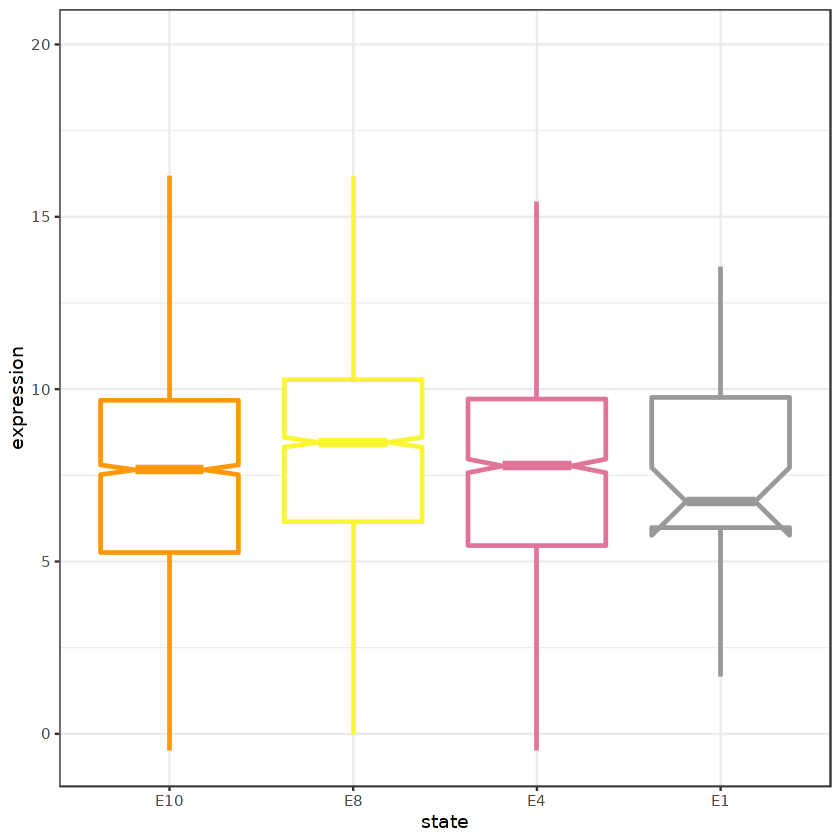

In [23]:
makeExpPlotSingle(LA1202_plotforPaper,20)


# Density plots (average width of an enhancer)

In [24]:
#density plot of width and score
enhancer_all_LA <- read.table('allSamples.allEnh.targetPeak.score.sort.merged.width.sort.bed', sep="\t", header = FALSE, col.names = c("chrom","start","end","name","score","width"), stringsAsFactors = FALSE)




In [52]:
head(enhancer_all_LA)

chrom start  end   
1 chr1  200600 200800
2 chr1  777000 777800
3 chr1  778000 778600
4 chr1  793000 798600
5 chr1  815000 820400
6 chr1  824600 827600
  name                                                                         
1 9;LA1623_H3K27ac_cmb                                                         
2 9;LA1623_H3K27ac_cmb                                                         
3 9;LA1600_h3k27ac                                                             
4 9;LA1623_H3K27ac_cmb                                                         
5 19;LA1623_H3K27ac_cmb,19;LA1623_H3K4me2,9;LA1623_H3K27ac_cmb                 
6 19;LA1623_CTCF_2,19;LA1623_H3K27ac_cmb,19;LA1623_H3K4me2,9;LA1623_H3K27ac_cmb
  score    width
1 30.76572  200 
2  7.71714  800 
3  4.79364  600 
4  9.67553 5600 
5 96.35808 5400 
6 56.08872 3000

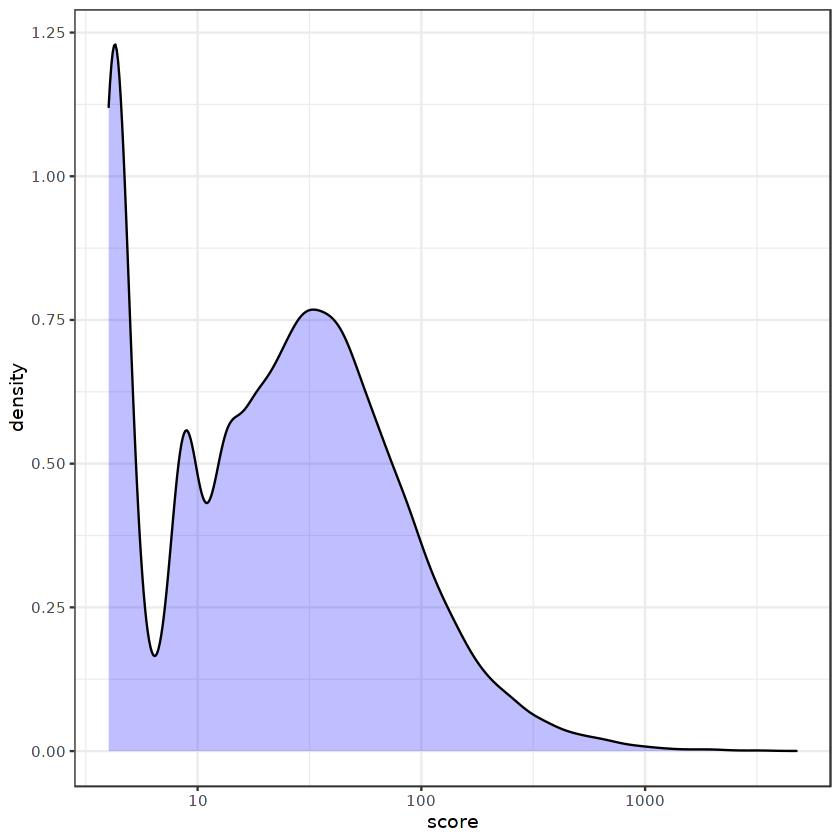

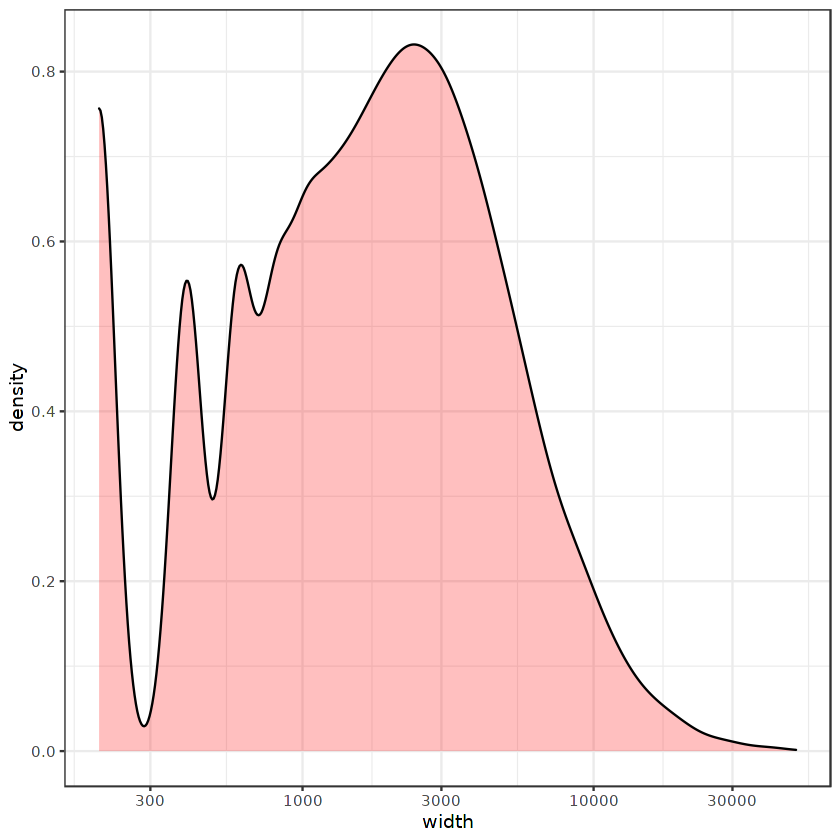

In [25]:
ggplot(enhancer_all_LA, aes(x = score)) + geom_density(fill="blue", alpha=0.25) + scale_x_log10()
ggplot(enhancer_all_LA, aes(x = width)) + geom_density(fill="red", alpha=0.25) + scale_x_log10()


# Scatter plots (comparing enhancer strength and gene expression)

In [26]:
LA_average_expression <- read.table('2019_08_13_LA_LV_normalized_RNA_seq_data_ensembl_coords.chr.avg.sort.bed', sep="\t", header = FALSE, col.names = c("chrom","start","end","gene_name","log2Tx","strand"), stringsAsFactors = FALSE)
LA_enh_avg_expression_intersect <- read.table('allSamples.allEnh.targetPeak.score.sort.merged.width.avgLAexpression.intersect', header=FALSE, col.names=c("chrom","start","end","name","score","width", "chrom_exp","start_exp","end_exp","gene_name","log2_exp","strand","intersect_width"),stringsAsFactors = FALSE)
LA_enh_HiC_loops_intersect <- read.table('allSamples.allEnh.targetPeak.score.sort.merged.width.heartAnyLoop.intersect', sep="\t", header=FALSE, col.names = c("chrom","start", "end","name","score","width","hiC_chrom","hiC_start","hiC_end","hiC_name","intersection_width"),stringsAsFactors = FALSE)

In [27]:
#need to separate the HiC identifier column:
LA_enh_HiC_loops_intersect_name_df <- separate(LA_enh_HiC_loops_intersect, hiC_name, into=c("bin","transcript","number","gene_name","VP_chrom","VP_loc"), sep="_", remove=TRUE, convert=TRUE)

#now to merge these, based on an identifier from the name, score combination
LA_enh_avg_expression_intersect$identifer <- paste(LA_enh_avg_expression_intersect$name, LA_enh_avg_expression_intersect$score, sep="_")
LA_enh_HiC_loops_intersect$identifier <- paste(LA_enh_HiC_loops_intersect$name, LA_enh_HiC_loops_intersect$score, sep="_")

#soo this file represents intersecting enhancers from LA (with a score) with HiC loops from LA and LV
#then we merged this file (using the gene name, cut from the hiC identifier) on the HGNC gene symbol, which is how the average LA expression
#values were calculated (after rolling up the isoforms)
LA_enh_hiC_LA_avg_gene_exp <- merge(LA_enh_HiC_loops_intersect_name_df,LA_average_expression, by="gene_name")
LA_enh_hiC_LA_avg_gene_exp$expr <- 2^LA_enh_hiC_LA_avg_gene_exp$log2Tx


Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 21374 rows [1, 2, 3, 4, 5, 6, 7, 16, 22, 23, 34, 35, 36, 39, 40, 57, 58, 59, 60, 61, ...].”


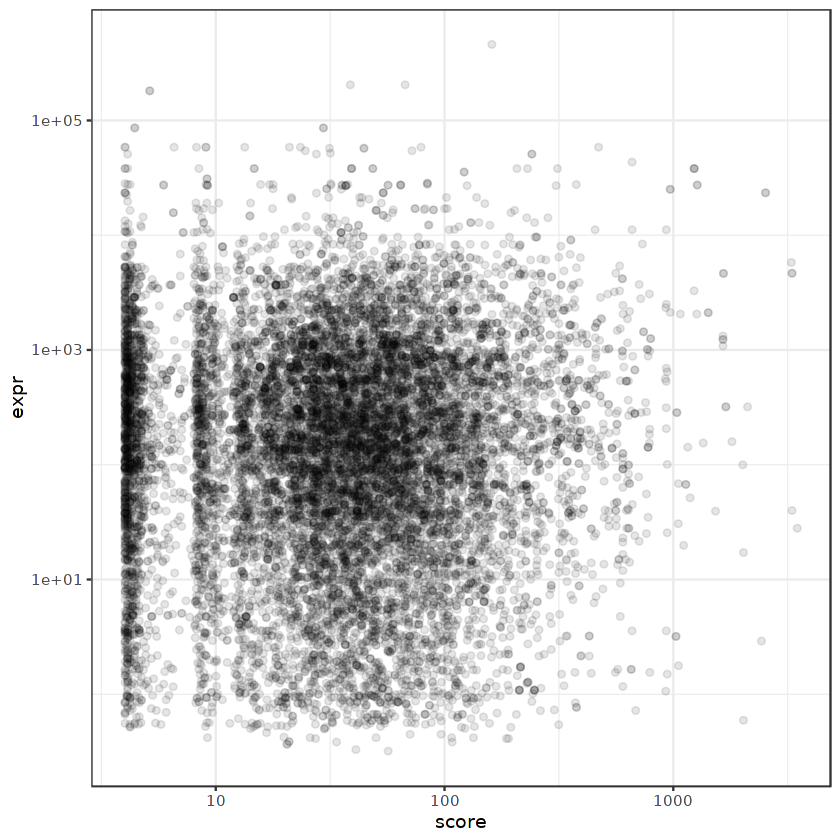

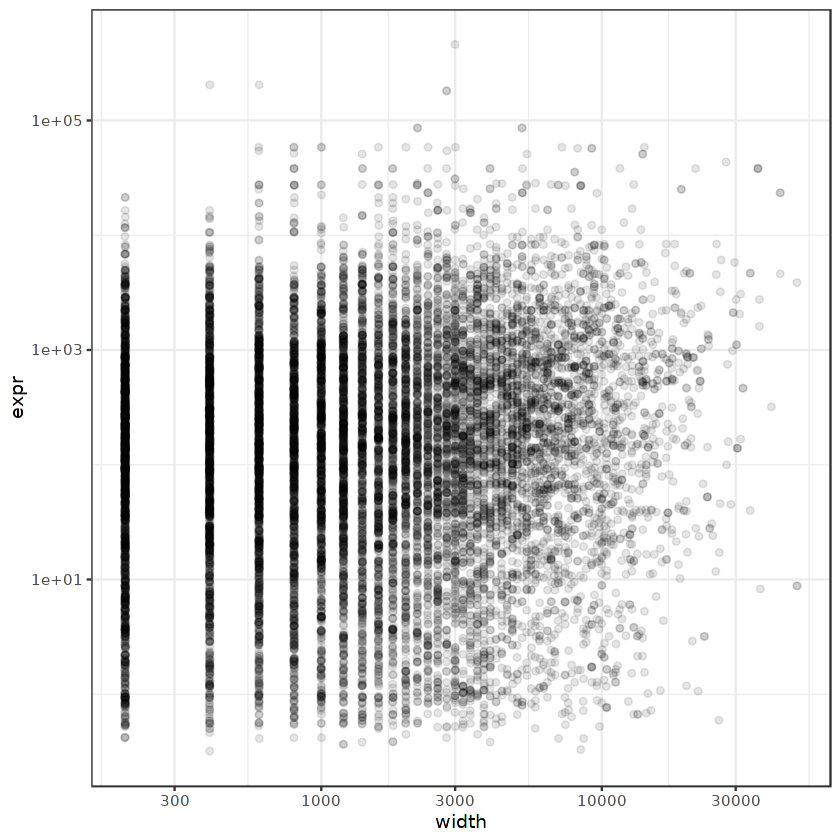

In [28]:
#what can we handle here:
#then do we see any association between enhancer scores and gene expression level?
ggplot(LA_enh_hiC_LA_avg_gene_exp, aes(x=score, y=expr)) + geom_jitter(alpha=0.1) + scale_x_log10() + scale_y_log10()

#width versus gene expression level
ggplot(LA_enh_hiC_LA_avg_gene_exp, aes(x=width, y=expr)) + geom_jitter(alpha=0.1) + scale_x_log10() + scale_y_log10()


# Saving a plot as a transparency embedded EPS file using the Cairo library

In [29]:
#going back to our first plot:
#https://ggplot2.tidyverse.org/reference/geom_bar.html
library(Cairo)
p <- all_traits_all_states %>% #we store this in a variable "p"
  ggplot(aes(x = trait, y = pct)) +  #plot traits on the X axis, and percentage across the Y axis
  geom_col(aes(fill = data)) + #use the "$data" variable to fill the columns (geom_col means this is a column or barplot)
  coord_flip() + #and finally flip it so we view the bar as horizontal and not vertical
  theme(text = element_text(size=18), axis.text.x = element_text(angle = 0, hjust = 0.5)) + labs(title = "Overlap between LA enhancers and CVD SNP loci") + labs(y="Percentage") + labs(x="CVD SNP set: R^2 > 0.8")

cairo_ps(filename = "2020_06_04_LA_enhancers.eps",
         width = 10, height = 7, pointsize = 12,
         fallback_resolution = 300)
print(p)
dev.off()


png 
  2

In [30]:
dir()

[1] "2019_08_13_LA_LV_normalized_RNA_seq_data_ensembl_coords.chr.avg.sort.bed"      
 [2] "2020_04_10_LA_specific_vs_all_enhancer.txt"                                    
 [3] "2020_06_04_LA_enhancers.eps"                                                   
 [4] "allSamples.allEnh.targetPeak.score.sort.merged.width.avgLAexpression.intersect"
 [5] "allSamples.allEnh.targetPeak.score.sort.merged.width.heartAnyLoop.intersect"   
 [6] "allSamples.allEnh.targetPeak.score.sort.merged.width.sort.bed"                 
 [7] "data"                                                                          
 [8] "gencode.v29.proteinCoding.names"                                               
 [9] "heart_vs_CM_downregulated.txt"                                                 
[10] "heart_vs_CM_upregulated.txt"                                                   
[11] "LA1202_21statemodel_RNAseq.intersect"                                          
[12] "plots"